<a href="https://colab.research.google.com/github/npauuul/modelo-prediccion-prestamos/blob/main/Predicci%C3%B3n_del_Monto_de_Pr%C3%A9stamos_Digitales_con_Python_y_Redes_Neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instalar dependencias necesarias

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2720/2720 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0026 - mae: 0.0026
Test MAE: 0.00


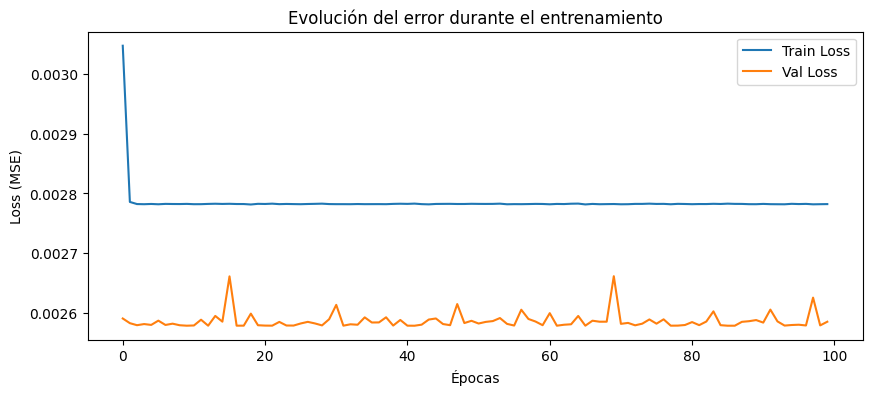

2720/2720 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


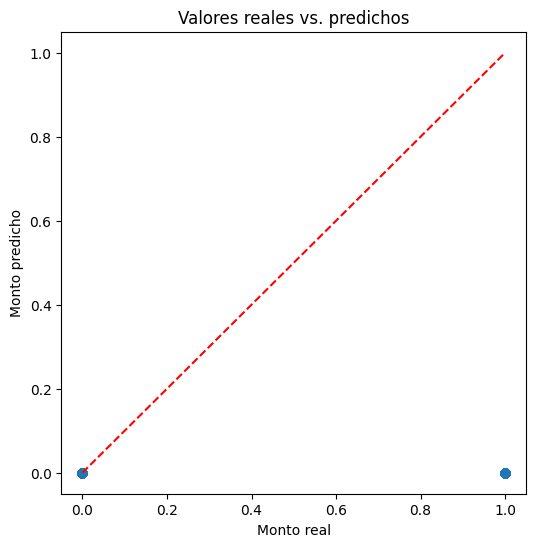

Modelo y transformadores guardados correctamente.


In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# 1. Cargar el dataset
df = pd.read_csv("prestamos_digitales.csv", sep=";")

# 2. Limpiar y preparar los datos
# Seleccionamos las columnas de interés
data = df[["rngSueldo", "promSaldoBanco3Um", "ventaPrestDig"]].copy()

# Procesar los valores nulos o faltantes (si los hubiera)
data = data.dropna()

# Convertir 'rngSueldo' (categórica) a variables numéricas usando OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
sueldo_encoded = encoder.fit_transform(data[["rngSueldo"]])

# Escalar 'promSaldoBanco3Um' para mejorar el entrenamiento
scaler = MinMaxScaler()
saldo_scaled = scaler.fit_transform(data[["promSaldoBanco3Um"]])

# Unir las variables preparadas
X = np.hstack([sueldo_encoded, saldo_scaled])
y = data["ventaPrestDig"].values

# 3. Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Construir la red neuronal
model = keras.Sequential([
    keras.layers.Dense(8, activation='relu', input_shape=(X.shape[1],)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1) # Salida continua
])

model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

# 5. Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.1, verbose=0)

# 6. Evaluar el modelo
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {test_mae:.2f}")

# 7. Graficar la evolución del error
plt.figure(figsize=(10,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Épocas')
plt.ylabel('Loss (MSE)')
plt.title('Evolución del error durante el entrenamiento')
plt.legend()
plt.savefig("grafico_loss.png")
plt.show()

# 8. Graficar valores predichos vs reales
y_pred = model.predict(X_test).flatten()
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Monto real")
plt.ylabel("Monto predicho")
plt.title("Valores reales vs. predichos")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.savefig("grafico_pred_vs_real.png")
plt.show()

# 9. Guardar el modelo y los transformadores
model.save("modelo_prestamos.h5")
import joblib
joblib.dump(encoder, "encoder_sueldo.pkl")
joblib.dump(scaler, "scaler_saldo.pkl")

print("Modelo y transformadores guardados correctamente.")